Let's try to implement a convolutional neural netowrk for digits classification
Some borrowed from: 

https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/02-intermediate/convolutional_neural_network/main.py
Ke Wang 2019.4.9

In [83]:
%matplotlib notebook
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import sigpy.plot as pl

# Device Configuration

In [84]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [85]:
# Hyper parameters
num_epochs = 50
num_classes = 10
batch_size = 100
learning_rate = 0.001

# Preprocessing

In [86]:
#MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)
test_dataset = torchvision.datasets.MNIST(root='data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

Processing...
Done!


<IPython.core.display.Javascript object>


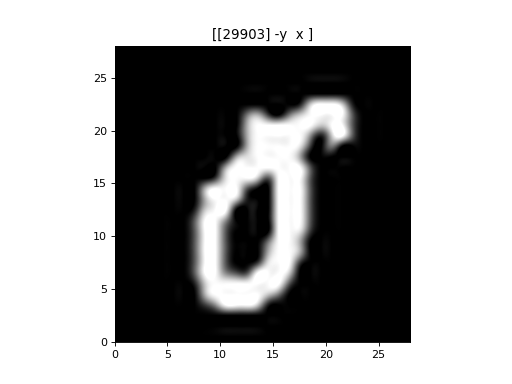

In [89]:
pl.ImagePlot(np.array(train_dataset.train_data))

In [87]:
# Create Training data
train_dataset_im = train_dataset.train_data
train_dataset_label = train_dataset.train_labels
n_train = train_dataset_im.shape[0]
n_permute = np.random.permutation(n_train)

In [38]:
#Define Neural network Structure
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

In [90]:
# Define a network
model = ConvNet(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
total_step = int(n_train/batch_size)
for epoch in range(num_epochs):
    for i in range(total_step):
        index_train = n_permute[i*batch_size:(i+1)*batch_size]
        images = train_dataset_im[index_train,:,:].unsqueeze(1).to(device).float()/255.0
        labels = train_dataset_label[index_train].to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/50], Step [100/600], Loss: 0.2366
Epoch [1/50], Step [200/600], Loss: 0.0646
Epoch [1/50], Step [300/600], Loss: 0.1827
Epoch [1/50], Step [400/600], Loss: 0.0313
Epoch [1/50], Step [500/600], Loss: 0.1192
Epoch [1/50], Step [600/600], Loss: 0.0138
Epoch [2/50], Step [100/600], Loss: 0.1097
Epoch [2/50], Step [200/600], Loss: 0.0252
Epoch [2/50], Step [300/600], Loss: 0.0739
Epoch [2/50], Step [400/600], Loss: 0.0109
Epoch [2/50], Step [500/600], Loss: 0.0943
Epoch [2/50], Step [600/600], Loss: 0.0056
Epoch [3/50], Step [100/600], Loss: 0.1040
Epoch [3/50], Step [200/600], Loss: 0.0284
Epoch [3/50], Step [300/600], Loss: 0.0432
Epoch [3/50], Step [400/600], Loss: 0.0057
Epoch [3/50], Step [500/600], Loss: 0.0849
Epoch [3/50], Step [600/600], Loss: 0.0045
Epoch [4/50], Step [100/600], Loss: 0.0789
Epoch [4/50], Step [200/600], Loss: 0.0262
Epoch [4/50], Step [300/600], Loss: 0.0283
Epoch [4/50], Step [400/600], Loss: 0.0036
Epoch [4/50], Step [500/600], Loss: 0.0624
Epoch [4/50

Epoch [32/50], Step [300/600], Loss: 0.0007
Epoch [32/50], Step [400/600], Loss: 0.0000
Epoch [32/50], Step [500/600], Loss: 0.0001
Epoch [32/50], Step [600/600], Loss: 0.0000
Epoch [33/50], Step [100/600], Loss: 0.0001
Epoch [33/50], Step [200/600], Loss: 0.0000
Epoch [33/50], Step [300/600], Loss: 0.0003
Epoch [33/50], Step [400/600], Loss: 0.0000
Epoch [33/50], Step [500/600], Loss: 0.0002
Epoch [33/50], Step [600/600], Loss: 0.0000
Epoch [34/50], Step [100/600], Loss: 0.0016
Epoch [34/50], Step [200/600], Loss: 0.0005
Epoch [34/50], Step [300/600], Loss: 0.0109
Epoch [34/50], Step [400/600], Loss: 0.0000
Epoch [34/50], Step [500/600], Loss: 0.0001
Epoch [34/50], Step [600/600], Loss: 0.0001
Epoch [35/50], Step [100/600], Loss: 0.0001
Epoch [35/50], Step [200/600], Loss: 0.0005
Epoch [35/50], Step [300/600], Loss: 0.0001
Epoch [35/50], Step [400/600], Loss: 0.0000
Epoch [35/50], Step [500/600], Loss: 0.0000
Epoch [35/50], Step [600/600], Loss: 0.0000
Epoch [36/50], Step [100/600], L

In [79]:
# Create Testing data
test_dataset_im = test_dataset.test_data
test_dataset_label = test_dataset.test_labels
n_test = test_dataset_im.shape[0]
n_permute_test = np.random.permutation(n_test)

In [91]:
# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
total_step = int(n_test/batch_size)
with torch.no_grad():
    correct = 0
    total = 0
    for i in range(total_step):
        index_test = n_permute_test[i*batch_size:(i+1)*batch_size]
        images = test_dataset_im[index_test,:,:].unsqueeze(1).to(device).float()/255.0
        labels = test_dataset_label[index_test].to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')


Test Accuracy of the model on the 10000 test images: 99.33 %
